$$ \bf{EE0404\ SIGNAL\ PROCESSING\ APPLICATIONS} $$
$$ \ $$
$$ $$
$$ \text{Lecture 7} $$

$$ \text{Time-domain filters: Echo filter}
 $$

$$ \text{ By: Güray GÜRKAN, PhD} $$

$$ Aug\ 2016 $$

# What is an echo?

- Echo is the indirect signal approaching from a sound source.


- It is the delayed and attenuated version of the original source.


- Echo is audible because the speed of sound is relatively slow, about 343 meters per second.



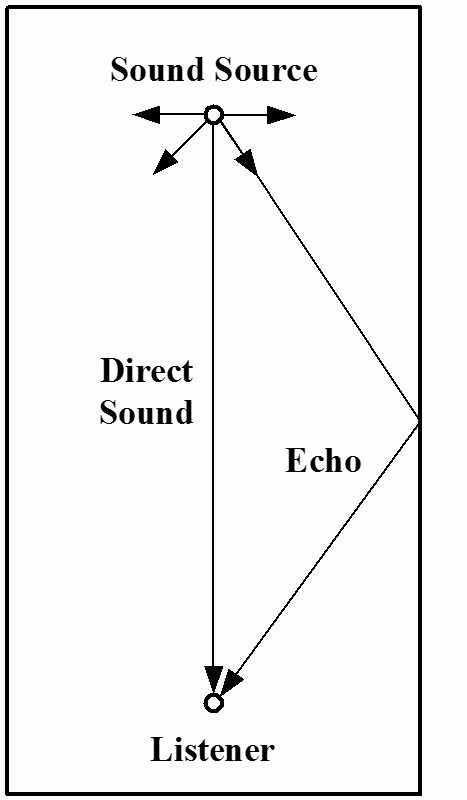

In [1]:
from IPython.display import Image, Audio
Image('.\Figs\EE0404_Lecture7_fig1.png',width=200)

# SINGLE ECHO GENERATOR 

## Manual echo generation

- Consider that you have generated a signal $x(n)$ with a finite duration.

- How can you obtain a new signal that involves the original signal and signal's echo?

- Which parameters should be given?

    1) What is the delay of the echo?
    
    2) What is the relative amplitude of echo?


### *Solution*

1) **What is the delay of the echo?**

It is given in seconds and that should be transformed to samples for digital systems. Let’s say the delay is R samples:

$$ e(n) = x(n-R) $$

For this state, the delay of the echo in time is given by  $$ \Delta t = R\ T_s $$
						
2) **What is the relative amplitude of echo?**

The echo is the attenuated version of the original signal. That is,

$$ e(n) = \alpha\ x(n-R),\ \ \ \alpha \lt 1 $$

For a single echo generator, the output is the sum of original and the echo signals:

$$ y(n) = x(n) + \alpha\ x(n-R) $$




# Impulse response of single echo filter

$$ y(n) = x(n) + \alpha\ x(n-R) $$

- What is the impulse response of above system?

***OR***

- What is the output if $ x(n)= \delta(n) $ ?

### *Solution*

By putting $x(n) = \delta(n)$, 

$$ h(n) = \delta(n) + \alpha\ \delta(n-R) $$

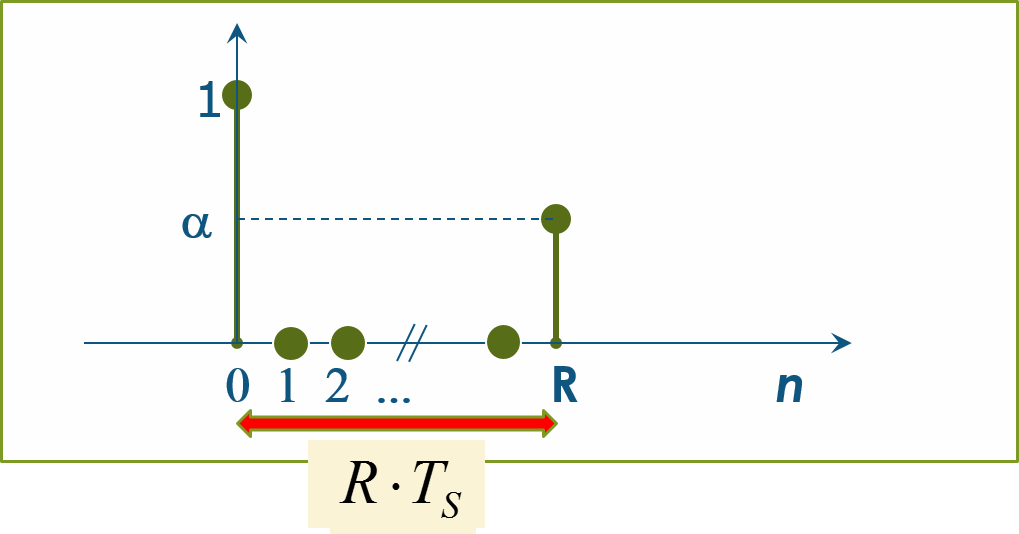

In [2]:
Image('.\Figs\EE0404_Lecture7_fig2.png',width=500)

# Single Echo Generator: $H(z)$ ?

** 1.) From difference equation ** 

$$ y(n) = x(n) + \alpha\ x(n-R) $$

$$ \downarrow Z\{ \ \}  \downarrow$$

$$ Y(z) = X(z) + \alpha\ X(z)z^{-R}  $$

$$ H(z) = \frac{Y(z)}{X(z)}=1 + \alpha\ z^{-R} $$

** 2.) Directly from impulse response **

$$ h(n) = \delta(n) + \alpha\ \delta(n-R) $$

$$ \downarrow Z\{ \  \}  \downarrow$$

$$ H(z) = 1 + \alpha\ z^{-R} $$



# Single Echo Generator: Direct I Form

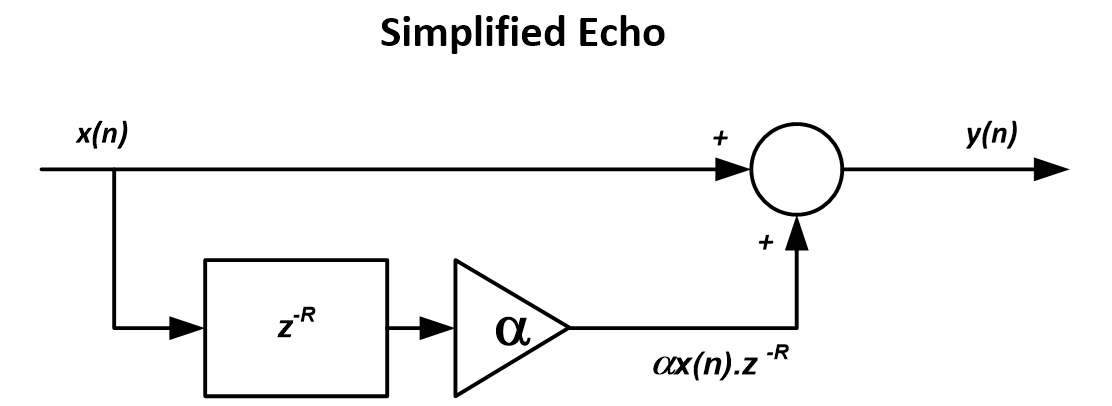

In [3]:
Image('.\Figs\EE0404_Lecture7_fig3.png',width=500)


# Single Echo Filtering 

## 1.Test Signal Generation

For test signal, we will now generate a decaying sinusoidal tone. For this, we need two signals and their multiplication.

**SIGNAL  1:**
- Generate 3 seconds of a tone that has a frequency of 440 Hz and sampled at 8 kHz. 

**SIGNAL 2:**
- Generate 3 seconds of an exponential with a damping factor of -5 (1/seconds) again sampled at 8 kHz. 


Populating the interactive namespace from numpy and matplotlib


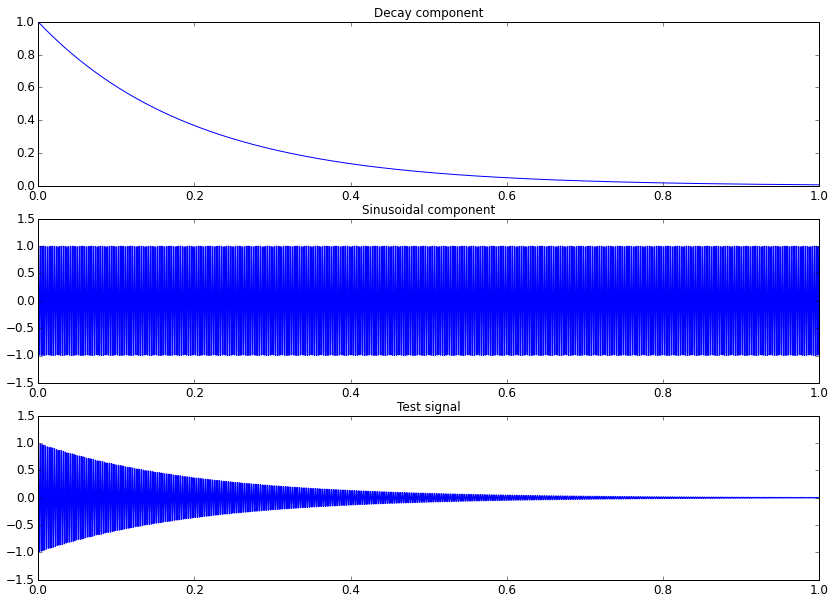

In [2]:
%pylab inline
rcParams['figure.figsize']=(14,10)
rcParams['xtick.labelsize']='large'
rcParams['ytick.labelsize']='large'

fs = 8000.0
n = arange(3*fs)
t = n/fs;

sincomp = sin(2*pi*440*t)
decaycomp = exp(-5*t)
testsig = sincomp*decaycomp

subplot(3,1,1)
xlim([0,1]),ylim([0,1])
plot(t,decaycomp)
title('Decay component')

subplot(3,1,2)
plot(t,sincomp)
title('Sinusoidal component')
xlim([0,1]),ylim([-1.5,1.5])

subplot(3,1,3)
plot(t,testsig)
xlim([0,1]),ylim([-1.5,1.5])
title('Test signal')


In [5]:
Audio(data=testsig,rate=fs)

## 2. Filter Generation

- We want to generate a single echo filter with
    - 400 ms time delay
    - %  10 echo ratio. $f_s$ is again 8 kHz.

- Calculate and write numerator (b) and denumerator (a) coefficient vectors.



## *Solution*

$$ \Delta t = 0.4\text{ seconds} = RT_s= R \frac{1}{f_s} \to R = 0.4\ 8000 = 3200\text{ samples} $$
$$ \alpha = 0.1 $$

Thus, the impulse response is
$$ h(n) = \delta(n) + 0.1\delta(n-3200) $$

and $H(z)$ is

$$ H(z) = 1 + 0.1 z^{-3200} $$

The general form of transfer function $H(z)$ can be written

$$ H(z) = \frac{b_0 + b_1 z^{-1}+ b_2 z^{-2} +\dots + b_M z^{-M}}{a_0 + a_1 z^{-1}+ a_2 z^{-2} +\dots + a_N z^{-N}} $$

The numerator and denumarator coefficients are given in two vectors, one for numerator as

$$ \textbf{b} = \{b_0, b_1,\dots, b_M\}  $$

and one for denumarator as

$$ \textbf{a} = \{a_0, a_1,\dots, a_N\}  $$

For the single echo filter, we have

$$ \textbf{b} = \{1, 0, 0, \dots,\ \ 0.1\} $$
$$ \textbf{a} = \{1 \} $$

Vector $\textbf{b} $ has 3200-1=3199 zeroes. 


In [6]:
# Codes:

fs = 8000.0
alpha = 0.1
R = .4*fs

zer = zeros((R-1))
b = hstack((1,zer))
b = hstack((b, alpha))

a= 1.0

C:\Python27\lib\site-packages\ipykernel\__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


## *Plotting impulse response*

Since 
$$ H(z) = 1 + 0.1\ z^{-3200} $$

the impulse response coefficients are directly the numerator elements.


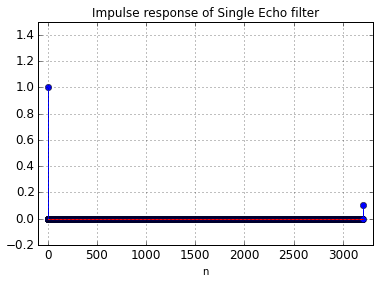

In [7]:
n = arange(len(b))

stem(n,b)
xlim([-100, 3300]), ylim([-.2, 1.5])
xlabel('n'),grid(True)
title('Impulse response of Single Echo filter')

# 3. Filtering (Echo generation)

To filter an input signal $ \textbf{x} $ via transfer function $ H(z)$ with coefficient vectors $ \textbf{b}$ and $ \textbf{a}$, we use **lfilter()** command (*from scipy.signal module*) :

    output = filter(b,a,x)

In [8]:
from scipy.signal import *

y = lfilter(b,a,testsig)

## *Output: Let's listen first :) *

In [9]:
Audio(data = y, rate = fs )

## *Output: Waveform inspection*

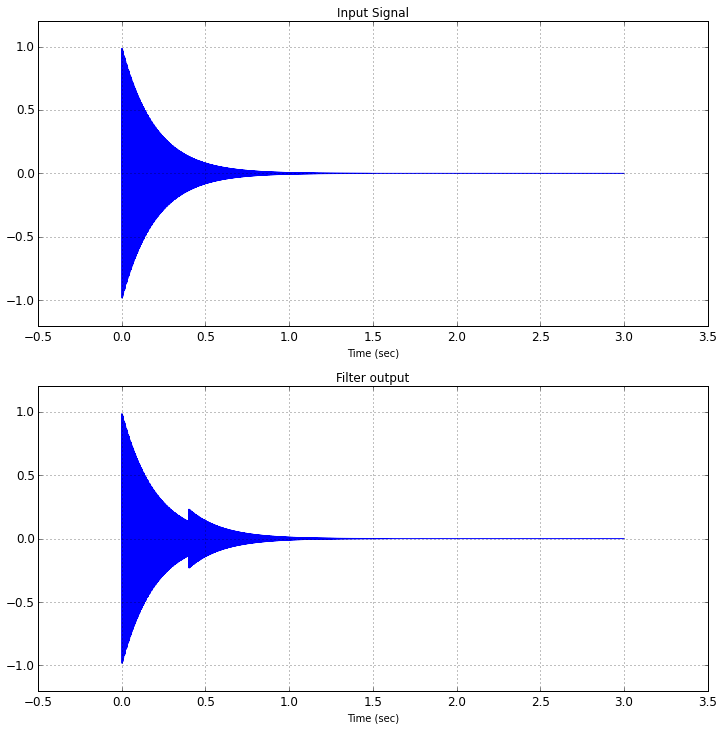

In [10]:
rcParams['figure.figsize']=(12,12)
subplot(2,1,1)
plot(t,testsig)
xlabel('Time (sec)')
xlim([-.5, 3.5]), ylim([-1.2, 1.2]),grid(True)
title('Input Signal')

subplot(2,1,2)
plot(t,y)
xlabel('Time (sec)')
xlim([-.5, 3.5]), ylim([-1.2, 1.2]),grid(True)
title('Filter output')

As the figures reveal, we have a second component added to input signal at time instance of 400 ms. The second peak amplitude depends on the occurence of echo time ($R$) and ratio ($\alpha $). 

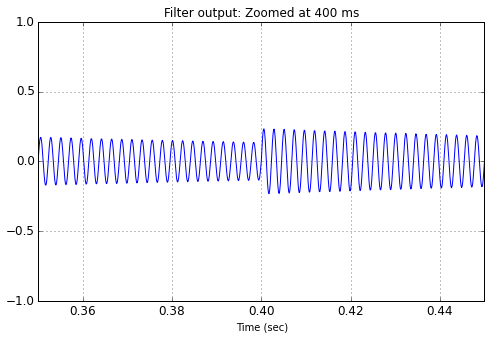

In [11]:
rcParams['figure.figsize']=(8,5)
plot(t,y)
xlabel('Time (sec)')
xlim([.35, .45]),grid(True)
title('Filter output: Zoomed at 400 ms')

## 4. Inspection of Frequency Response

$$ H(z) = 1 + \alpha\ z^{-R} $$

$$ H(z) \| _{z=e^{jw}} = H(e^{j\omega}) = 1 + \alpha e^{j\omega R} $$ 

The norm of $H(z)$ gives the magnitude of frequency response:

$$ \|H(e^{j\omega}) \| = \sqrt{H(e^{j\omega}) H^*(e^{j\omega})} $$

$$ \|H(e^{j\omega}) \| = \sqrt{\left(1 + \alpha e^{j\omega R} \right)\left(1 + \alpha e^{-j\omega R} \right)  } $$

$$ \|H(e^{j\omega}) \| = \sqrt{1 + \alpha \left( e^{j\omega R} + e^{-j\omega R} \right) + \alpha ^2 } $$

Using Euler's equation,

$$ \|H(e^{j\omega}) \| = \sqrt{ 1 + 2 \alpha cos(\omega R)  + \alpha ^2 } $$



### *Minimum and Maximum Values of Frequency Response*


$$ \|H(e^{j\omega}) \| = \sqrt{ 1 + 2 \alpha cos(\omega R)  + \alpha ^2 } $$

The first and third elements in square-root is always positive, however $ cos()$ term has a range of $\{-1,1\}$. 

- 1.) The * **minimum value** * is obtained if $cos(\omega R) = -1$. For this state:

$$ \|H(e^{j\omega}) \| _{min} = \sqrt{ 1 - 2 \alpha  + \alpha ^2 } $$

$$ \|H(e^{j\omega}) \| _{min} = \sqrt{ \left(1-\alpha  \right)^2}= \left| 1 - \alpha \right| $$

Thus, for $ 0 \lt \alpha \lt 1 $, the minimum value of $\|H(e^{j\omega}) \| $ converges zero as echo ratio approaches to 1.

- 2.) The * **maximum value** * is obtained if $cos(\omega R) = 1$. For this state:

$$ \|H(e^{j\omega}) \| _{max} = \sqrt{ 1 + 2 \alpha  + \alpha ^2 } $$

$$ \|H(e^{j\omega}) \| _{max} = \sqrt{ \left(1+\alpha  \right)^2}= \left| 1 + \alpha \right| $$

Thus, for $ 0 \lt \alpha \lt 1 $, the maximum value of $\|H(e^{j\omega}) \| $  is limited to $[1 - 2] $ and converges to 1 as
echo ratio approaches to zero. 

An interesting property on $ \|H(e^{j\omega}) \|_{min}$ and $ \|H(e^{j\omega}) \|_{max} $ is that they are independent from $ R $, the delay of the echo.

### * **Plotting Magnitude of Frequency Response** *

### 1) Iterative Plot

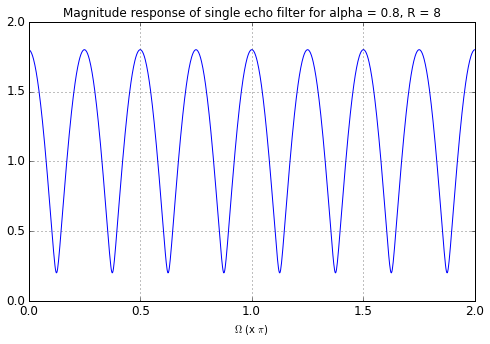

In [12]:
rcParams['figure.figsize']=(8,5)

R = 8 # delay of echo in samples
alpha = 0.8 # echo ratio

w = linspace(0,2*pi,1000)

H = 1 + alpha*exp(1j*w*R)

plot(w/pi,abs(H))
ylim([0, 2])
grid(True)
title('Magnitude response of single echo filter for alpha = 0.8, R = 8' )
xlabel('$\Omega$ (x $\pi$) ')


### 2) Using freqz() command

C:\Python27\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


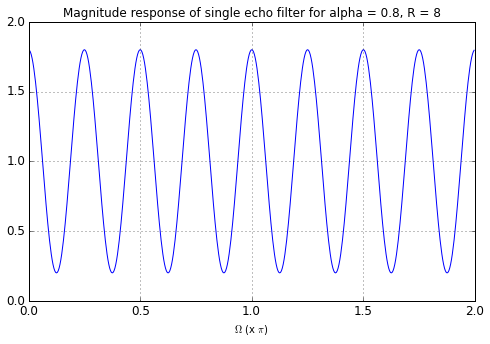

In [13]:
b = hstack((1, zeros(R-1)))
b = hstack((b, alpha))
a = 1
w, h = freqz(b,a,whole = True)

plot(w/pi,h)
ylim([0, 2])
grid(True)
title('Magnitude response of single echo filter for alpha = 0.8, R = 8' )
xlabel('$\Omega$ (x $\pi$) ')


# MULTIPLE ECHO GENERATOR

For the single echo filters, the impulse response has two dirac functions, seperated by $R$ samples. For the multiple echo filters, the impulse response has $N$ dirac functions and filter generates $N-1$ echoes. The echoes have constant time delay and amplitude ratio. That is, each of the echo has a fold attenuated amplitude than the previous echo.




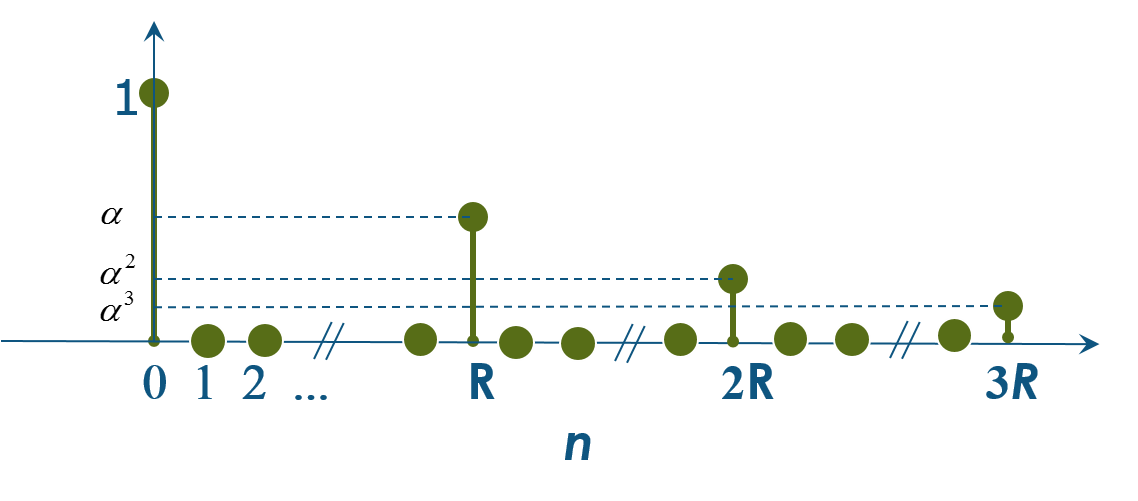

In [16]:
Image('.\Figs\EE0404_Lecture7_fig4.png',width=600)

The difference equation is

$$ y(n) = x(n)  + \alpha x\left(n-R\right) + \alpha^2 x \left( n-2R \right)+ \dots + \alpha^{N-1} x\left(n-(N-1)R\right) $$
$$ y(n) = \sum _{k = 0}^{N-1} \alpha^k x(n-kR) $$

and the transfer function $H(z)$ 
$$ H(z) = \frac{Y(z)}{X(z)} = 1  + \alpha z^{-R} + \alpha^2 z^{-2R}+ \dots + \alpha^{N-1} z^{-(N-1)R} $$

The implementation of this filter would required $N-1$ delay elements and would have an $F.I.R.$ form. However, by using finite sum property:

$$ 1+u+u^2+\dots + u^{N-1} = \frac{1-u^N}{1-u} \text{, where } |u|<1 $$

and putting $u = \alpha z^{-R} $, $H(z)$ can be transformed to

$$ H(z) = \frac{1-\alpha^N z^{-NR}} {1-\alpha z^{-R}}$$

which has an $ I.I.R.$ type $H(z)$. The yielding difference equation is

$$ y(n) - \alpha y(n-R) = x(n) - \alpha^N x(n-NR) $$



# Multiple Echo Filter

## Example

We want to generate 500ms seperated multiple echoes using filter with 4 echoes and $f_s$ = 8 kHz. The echo ratio is 0.4. 


 ** *Solution* **
 
 If number of echoes is 4 we have 
 
 $$ N-1 = 4 \to N=5 $$
 
 In addition, since $\Delta t$=500  we have 
 
 $$ \Delta t = \frac{R} {f_s} \to R = f_s\ \Delta t = 8000\ 0.5 = 4000 $$
 
 Thus,
 
 $$ H(z) = \frac{1-0.4^5 z^{-5\ 4000}}{1-0.4\ z^{-4000}}= \frac{1-0.0102\ z^{-20000}}{1-0.4\ z^{-4000}}$$
 
 

## Implementation


** *Generation of coefficient vectors* **

In [35]:
fs = 8000.0 ;
N = 5.0;
alpha = 0.4;
R = 0.5*8000;
b2= hstack((1, zeros(R*N-1)))
b2= hstack((b2,-power(alpha,N)))

a2= hstack((1, zeros(R-1)))
a2= hstack((a2,-alpha))

C:\Python27\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Python27\lib\site-packages\ipykernel\__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


** *Filtering* **

In [38]:

y2 = lfilter(b2,a2,testsig)

** *How does it sound?* **

In [39]:
Audio(data=y,rate=fs)

** *Input and output waveforms* **

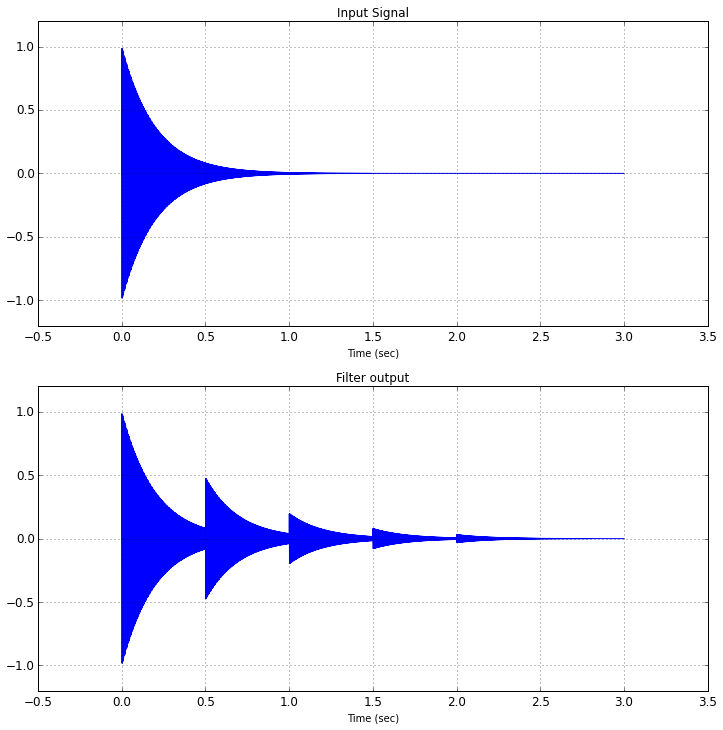

In [40]:
rcParams['figure.figsize']=(12,12)
subplot(2,1,1)
plot(t,testsig)
xlabel('Time (sec)')
xlim([-.5, 3.5]), ylim([-1.2, 1.2]),grid(True)
title('Input Signal')

subplot(2,1,2)
plot(t,y2)
xlabel('Time (sec)')
xlim([-.5, 3.5]), ylim([-1.2, 1.2]),grid(True)
title('Filter output')